# Import Libraries and Dataset

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import shutil
from PIL import Image

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

from matplotlib import pyplot as plt
%matplotlib inline

libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow8DataType18ComputeFingerprintB5cxx11Ev
/usr/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow8DataTy

# Creating the Correlation Heatmaps

To determine which sites and variables to select for our final analysis, we created a correlation heatmap. 

### Reading the dataset

We will be analysing data at each site across the years, so we first need to combine each year's xarray into a single xarray. Again, we will use the Hervey Bay site as an example. 

Note: this is being read from a folder called Hervey Bay so the folder name needs to also be specified. 

In [3]:
data = xr.open_mfdataset('HerveyBay/HerveyBay*.nc')

In order to create the correlation heatmap, we will need to transform the data from an xarray into a dataframe

In [4]:
ds = data.to_dataframe()

Now we can view the dataframe for Hervey Bay  just created

In [5]:
ds

TOTAL_NITROGEN       temp  \
time                latitude   longitude                               
2011-01-01 02:00:00 -25.786022 152.308788             NaN        NaN   
                               152.338788             NaN        NaN   
                               152.368788             NaN        NaN   
                               152.398788             NaN        NaN   
                               152.428788             NaN        NaN   
...                                                   ...        ...   
2014-12-31 02:00:00 -24.826022 153.178788       94.657639  28.645439   
                               153.208788             NaN        NaN   
                               153.238788       73.888550  26.539118   
                               153.268788       74.112617  26.245874   
                               153.298788       74.420456  26.209278   

                                            salinity      light      seagrass  
time                latitude   longitude                                       
2011-01-01 02:00:00 -25.786022 152.308788        NaN        NaN           NaN  
                               152.338788        NaN        NaN           NaN  
                               152.368788        NaN        NaN           NaN  
                               152.398788        NaN        NaN           NaN  
                               152.428788        NaN        NaN           NaN  
...                                              ...        ...           ...  
2014-12-31 02:00:00 -24.826022 153.178788  35.992073  51.149826  1.000000e-12  
                               153.208788        NaN        NaN           NaN  
                               153.238788  35.544266  40.702541  1.000000e-12  
                               153.268788  35.527679  37.264812  1.000000e-12  
                               153.298788  35.533760  19.605610  1.000000e-12  

[1639242 rows x 5 columns]

### Plotting the correlation heatmap

Now the dataframe has been created, we can proceed with plotting our heatmap

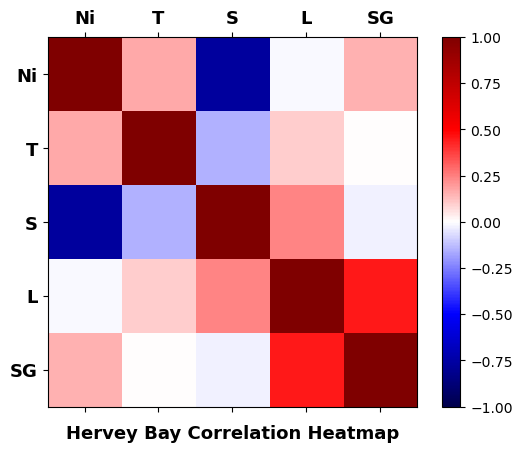

In [6]:
corr = ds.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap= 'seismic', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(ds.columns),1)

# Adding the axis labels 

ax.set_xticks(ticks)
plt.xticks(rotation=360)
ax.set_yticks(ticks)
ax.set_xticklabels(['Ni','T','S','L','SG'],fontsize=13,weight='bold')
ax.set_yticklabels(['Ni','T','S','L','SG'],fontsize=13,weight='bold')

# Adding the title

plt.title('Hervey Bay Correlation Heatmap', y=-0.01, pad=-20, fontsize=13, weight='bold')

# Saving the figure and displaying the plot

plt.savefig('HerveyBay/Correlation Heatmap of Hervey Bay', dpi=300, bbox_inches = "tight")
plt.show()

This needs to be repeated for each site

# Creating the GIFs

To determine the slice of area within each site to focus on, we created a series of GIFs.

### Reading the dataset

Here we read the dataset for the year which the GIFs are to be created for. Again using Hervey Bay as the example and the year 2011. 

Note: this is being read from a folder called Hervey Bay so the folder name needs to also be specified. 

In [6]:
HerveyBay2011 = xr.open_dataset('HerveyBay/HerveyBay2011.nc')

Now we view the xarray for Hervey Bay 2011:

In [7]:
HerveyBay2011

<xarray.Dataset>
Dimensions:         (time: 365, latitude: 33, longitude: 34)
Coordinates:
  * time            (time) datetime64[ns] 2011-01-01T02:00:00 ... 2011-12-31T...
  * latitude        (latitude) float64 -25.79 -25.76 -25.73 ... -24.86 -24.83
  * longitude       (longitude) float64 152.3 152.3 152.4 ... 153.2 153.3 153.3
Data variables:
    TOTAL_NITROGEN  (time, latitude, longitude) float32 ...
    temp            (time, latitude, longitude) float32 ...
    salinity        (time, latitude, longitude) float32 ...
    light           (time, latitude, longitude) float32 ...
    seagrass        (time, latitude, longitude) float32 ...

### Defining the plotting funciton 

The plotting function takes several arguments:
    
+ `ncdata`: the datafile like `HerveyBay2011`
+ `day`   : a specific integer corresponding a day in the year
+ `year`  : the specified year
+ `fname` : the name of the figure 
+ `show`  : showing the plot in the notebook or not (default is False)
+ `size`  : size of the figure (default (9, 10))
+ `color` : color used to plot the variable (default cmocean.cm.balance)'


Here we will be using seagrass density as the example

Note: you will need to change the 'cbar.set_label('______', ...)' when plotting each variable to ensure graphs are correctly labeled

In [8]:
def plotSGFig(ncdata, day, year, fname, show=False,
              size=(9, 10),color=cmocean.cm.balance):
    
    data = ncdata.isel(time=day)
    
    fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')
    ax = plt.axes(projection=ccrs.PlateCarree())
    cf = data.plot( 
        transform=ccrs.PlateCarree(), cmap=color,
        add_colorbar=False
    )
    cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                        orientation="horizontal")
# Adding label and gridlines 

    cbar.set_label('Seagrass N (g N m-2)', rotation=0, 
                   labelpad=5, fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10} 
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', 
                                                facecolor='lightgray'))
    ax.coastlines(linewidth=1)
    plt.tight_layout()
    plt.savefig(fname+'_'+str(year)+'_'+str(day)+".png",dpi=200, 
                    bbox_inches='tight')
    if show:
        plt.show()
        
    fig.clear()
    plt.close(fig)
    plt.clf()
    
    return

Here we can view the frames the plotting funciton will take. For this example we will use a frame Hervey Bay for the year 2011 for the day 0 of the year i.e the 1st of January 2011

Note: The fname is the name of the figure and corresponds to the file where the images are saved. There will be a folder for each variable at each site. 

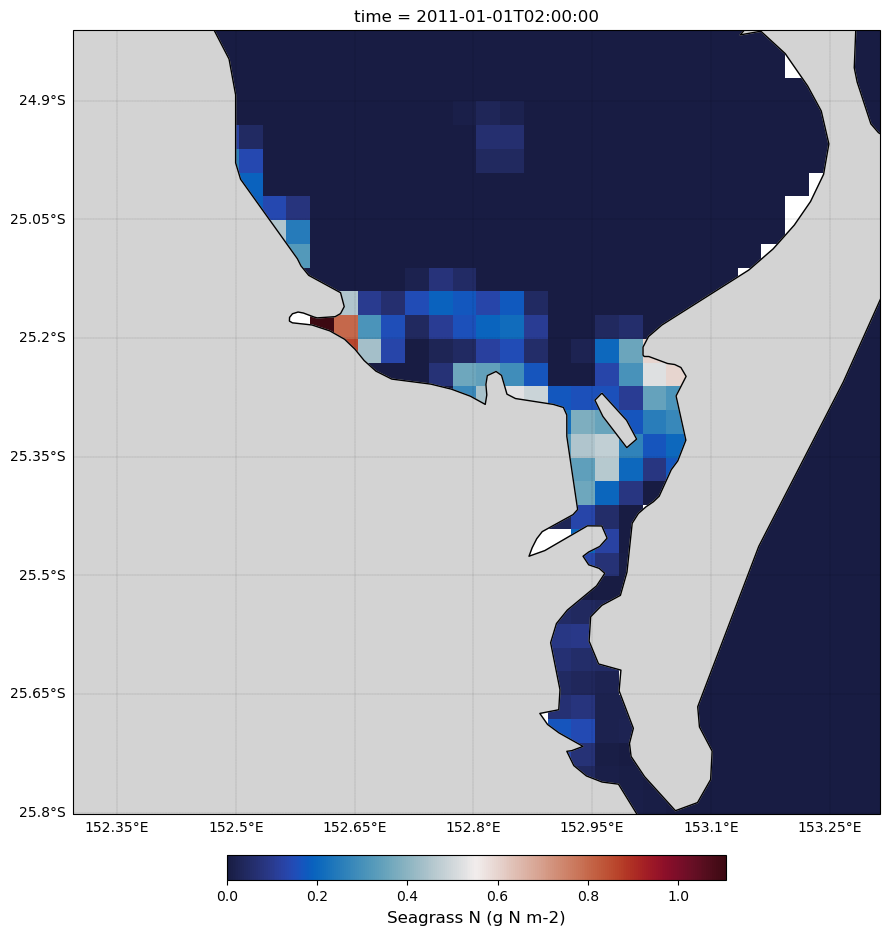

<Figure size 640x480 with 0 Axes>

In [9]:
fname = 'HerveyBay/Seagrass'
plotSGFig(HerveyBay2011.seagrass, 0, 2011, fname, show=True,
              size=(9, 10),color=cmocean.cm.balance)

### Creating individual frames to combine for the GIFs

We will create each figure with a chosen initial interval between consecutive figures. We want to achieve a GIF which includes a figure from roughly each month for each year, so we are choosing the interval of 29. 

Note: This will capture a figure every 30 days in the regular world as in the coding world counting starts at 0

In [10]:
interval = 29

Now we run our defined plotting function to create a plot every 30 days for 2011

In [11]:
year = 2011
fname = 'HerveyBay/Seagrass'
imgs = [] 
for day in range(0,len(HerveyBay2011.time),29):
    plotSGFig(HerveyBay2011.seagrass, day, year, fname, show=False,
              size=(9, 10),color=cmocean.cm.balance)
    imgs.append(fname+'_'+str(year)+'_'+str(day)+".png")

<Figure size 640x480 with 0 Axes>

We now create the frames for the GIFs

In [12]:
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

Finally, here we save the GIF into the corresponding folder mentioned above

In [ ]:
frames[0].save(fname+str(year)+'.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=0)

This needs to be repeated for each year, site and variable to obtain each GIF. 

See the GIFs for each site on the main branch to get an idea of what they look like. For our report we focused on the seagrass GIFs, but the others provided useful insights into the variable changes and compliment the results. 